In [3]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 8.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 48.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 22.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.8/335.8 kB 13.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


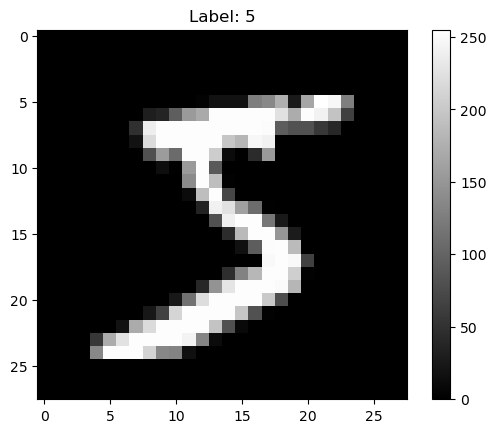

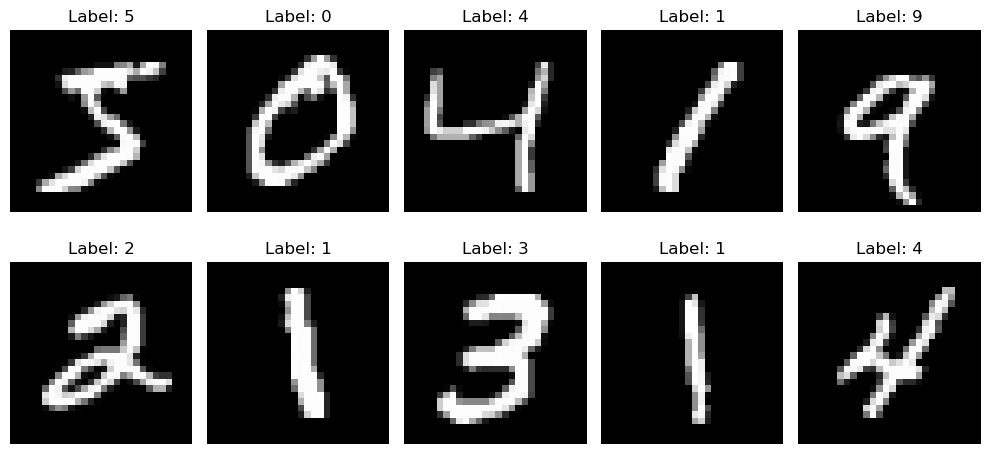

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the shape of the dataset
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

# Visualize the first training image
plt.imshow(X_train[0], cmap='grey')
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.show()

# Plot the first 10 images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)  # Create a 2x5 grid of subplots
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Hide axis labels
plt.tight_layout()
plt.show()


In [9]:
# Import necessary libraries
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist  # <-- Make sure to load the dataset

# Load dataset (X_train, y_train for training, X_test, y_test for testing)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images (convert pixel values from 0–255 to 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images (reshape 28x28 images into 784-length vectors)
X_train = X_train.reshape(X_train.shape[0], -1)  # -1 automatically determines the correct shape
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encode the labels (convert 0-9 labels into categorical arrays)
# eg.   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Label 3
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check the shape of preprocessed data
print(f"X_train shape: {X_train.shape}")  
print(f"y_train shape: {y_train.shape}")  
print(f"X_test shape: {X_test.shape}")    
print(f"y_test shape: {y_test.shape}")    

X_train shape: (60000, 784)
y_train shape: (60000, 10)
X_test shape: (10000, 784)
y_test shape: (10000, 10)


In [15]:
#Build and train the model

from tensorflow.keras.models import Sequential #linear stack layerseach layer has one input and one output
from tensorflow.keras.layers import Dense #each neuron in one layer is connected to every neuron

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer with 128 neurons
    Dense(64, activation='relu'),  # Another hidden layer with 64 neurons
    Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

#Compile the model (teach model how to learn)
model.compile(optimizer='adam', # help model to minimize error and maximize correctness
              loss='categorical_crossentropy', # measure how far the prediction from the right label
              metrics=['accuracy']) # Track the accuracy of the predicted value 

# Train the model with the training data
model.fit(X_train, y_train, # use fit to learn from images and labels
          epochs=5, # 5 full cycles of end to end learning and improving to ALL datas (60k images)
          batch_size=32, # Process 32 images a batch
          # Batches run per 1 epoch = 60,000/32 = 1875 bathes/epoch
          validation_data=(X_test, y_test)) # Track the accuracy 


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.8813 - loss: 0.4135 - val_accuracy: 0.9637 - val_loss: 0.1224
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.9679 - loss: 0.1069 - val_accuracy: 0.9716 - val_loss: 0.0918
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.9780 - loss: 0.0706 - val_accuracy: 0.9731 - val_loss: 0.0834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.9824 - loss: 0.0544 - val_accuracy: 0.9752 - val_loss: 0.0791
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.9877 - loss: 0.0395 - val_accuracy: 0.9766 - val_loss: 0.0811


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9728 - loss: 0.0939
Test Accuracy: 0.9766
Test Loss: 0.0811
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
Predicted: [7 2 1 0 4 1 4 9 5 9]
Actual: [7 2 1 0 4 1 4 9 5 9]


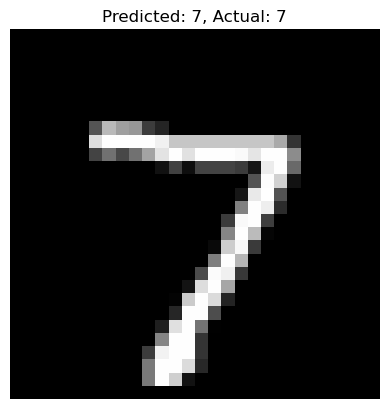

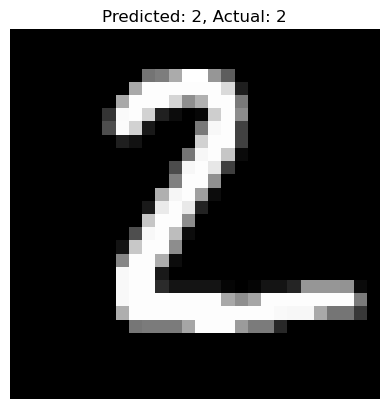

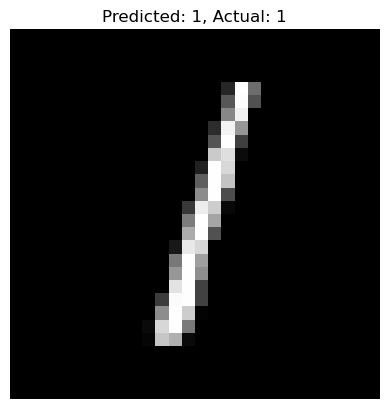

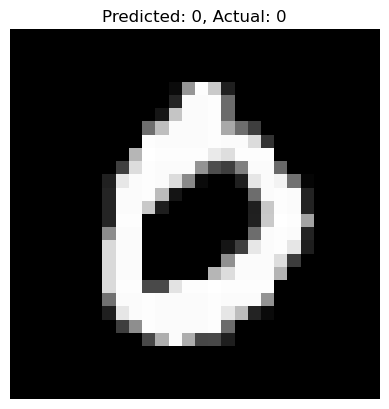

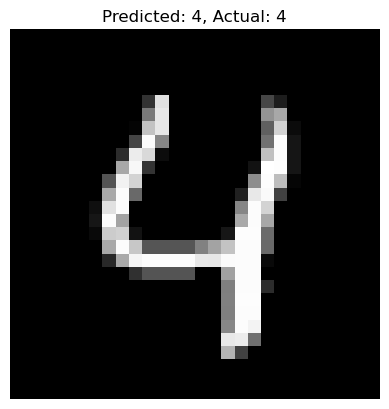

In [19]:
# Evaluating and Testing the model 
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

predictions = model.predict(X_test)

import numpy as np
# np.argmax() finds the index of the highest value in an array 
predicted_labels = np.argmax(predictions, axis=1) # Get the digit with highest probability
actual_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoding back to digits

print(f"Predicted: {predicted_labels[:10]}")
print(f"Actual: {actual_labels[:10]}")

import matplotlib.pyplot as plt

def plot_image(index):
    plt.imshow(X_test[index].reshape(28,28), cmap="gray")  # Reshape back to 28x28 for display
    plt.title(f"Predicted: {predicted_labels[index]}, Actual: {actual_labels[index]}")
    plt.axis("off")
    plt.show()

# Example: Show first 5 test images & predictions
for i in range(5):
    plot_image(i)


In [27]:
model.save("mnist_model.keras")
